In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

col_names = ['ID', 'Diagnosis']
metrics = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness',
           'Compactness', 'Concavity', 'Concave_Points', 'Symmetry', 'Fractal_Dimension']

for measure in ['Mean', 'SE', 'Worst']:
    for metric in metrics:
        col_names.append(f'{metric}_{measure}')

# I had some problems with Google Colab, so I'll just download directly.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None, names=col_names)

# Look of how the data looks:
df.info()
display(df.head())
print(df['Diagnosis'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius_Mean              569 non-null    float64
 3   Texture_Mean             569 non-null    float64
 4   Perimeter_Mean           569 non-null    float64
 5   Area_Mean                569 non-null    float64
 6   Smoothness_Mean          569 non-null    float64
 7   Compactness_Mean         569 non-null    float64
 8   Concavity_Mean           569 non-null    float64
 9   Concave_Points_Mean      569 non-null    float64
 10  Symmetry_Mean            569 non-null    float64
 11  Fractal_Dimension_Mean   569 non-null    float64
 12  Radius_SE                569 non-null    float64
 13  Texture_SE               569 non-null    float64
 14  Perimeter_SE             5

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Diagnosis
B    357
M    212
Name: count, dtype: int64


In [87]:
df_clean = df.drop('ID', axis=1)
df_clean['Diagnosis'] = df_clean['Diagnosis'].map({'M': 1, 'B': 0})

X = df_clean.drop('Diagnosis', axis=1)
y = df_clean['Diagnosis']

# use with 0.2 test size as it gave better results in testing, better than 0.1 as well?
# the random seed should be any random number, just test around and see, 35 has the best accuracy here.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# apply the standardization to the numbers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # apply the data to the scaler
X_test_scaled = scaler.transform(X_test)

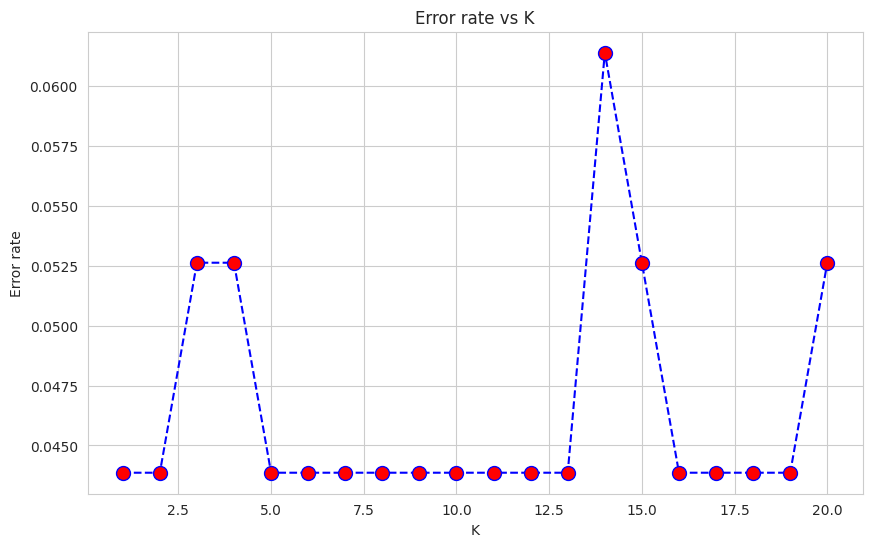

In [88]:
# checking the error rate
error_rate = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

# see nn K is the best to pick
plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [89]:
# evaluating the model
eval_k = 5
knn_final = KNeighborsClassifier(n_neighbors=eval_k)
knn_final.fit(X_train_scaled, y_train)
pred_final = knn_final.predict(X_test_scaled)

print("Matrix confusion:\n", confusion_matrix(y_test, pred_final))
print("\nReport:\n", classification_report(y_test, pred_final))

Matrix confusion:
 [[72  1]
 [ 4 37]]

Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       0.97      0.90      0.94        41

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## Findings
- Check what seed is the best you could fine, I found 35 to be good.
- Check around as well how many NNs should be looked for, 20 seems to be good enough here.
- The dataset seems to be pretty good, but I'd be more good with a more massive dataset, the dataset's size is ~525 rows or something.
